In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch
from IPython.display import display

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available():
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()):
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("/mnt/d/diffusion/StableDiffusion/data/vocab.json", merges_file="/mnt/d/diffusion/StableDiffusion/data/merges.txt")
model_file = "/mnt/d/diffusion/StableDiffusion/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

Using device: cuda


100%|██████████| 50/50 [00:04<00:00, 11.70it/s]


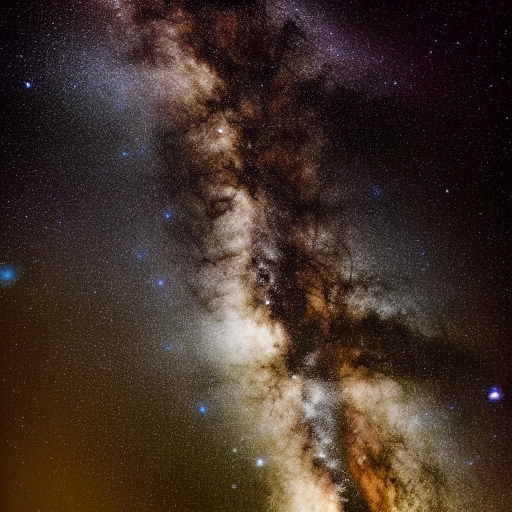

In [19]:
prompt = "Milky way galaxy as seen from a very clear sky"
uncond_prompt = ""
do_cfg = True
cfg_scale = 8
sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

image = Image.fromarray(output_image)
image.save("/mnt/d/diffusion/StableDiffusion/output/Milky way galaxy as seen from a very clear sky.jpg")
display(image)